## Final Project Submission

Please fill out:
* Student name: Karl Dorsainvil
* Student pace: self paced
* Scheduled project review date/time: November 14, 2019 @7:00 PM EST
* Instructor name: Eli Thomas
* Blog post URL: https://medium.com/@kdorsain/dealing-with-multicollinearity-of-features-2b13bc42fbe1


## Objective:
This project's objective is build a model that will predict as accurately as possible house prices in King County.

## Importing Necessary Libraries

In [1]:
# Importing libraries to load and analyze the data
import pandas as pd
import numpy as np

#Importing Library for visualization
import matplotlib.pyplot as plt
%matplotlib notebook

# Feature Scaling and Normalization


#  Feature Scaling & Model Validation Interpretation
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import seaborn as sns

# Feature Selection
from sklearn.feature_selection import RFE

# Cross Validation
from sklearn.model_selection import cross_val_score

## 1. Loading the Dataset

In [2]:
# Loading the pandas dataframe
data=pd.read_csv('kc_house_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


At first glance, we can see that there is some columns contain null values. These values might need to get replaced later on.

### 1.1. Visualizing the House Price Distribution

What is the price frequency of houses King County?

Text(0.5, 1.0, 'King County House Price Distribution')

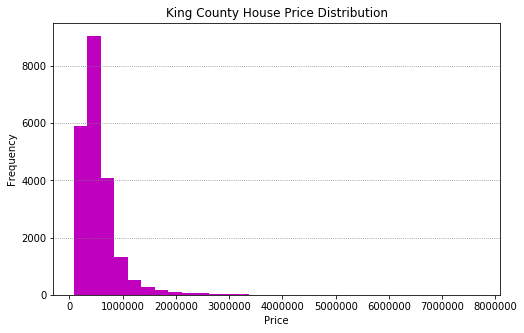

In [3]:
prices = data['price']
figure_size = plt.figure(figsize=(8,5)) #sets a different size (width, height)
ax = plt.subplot(111)
ax.yaxis.grid(color='gray', linestyle='dotted') # setting background color
plt.hist(prices, bins=30, color='m') # setting x-axis , bin and color values
plt.xlabel('Price') # naming the x-axis
plt.ylabel("Frequency") # naming the y-axis
plt.title("King County House Price Distribution")

Looking at the graph above, it can be determined that houses below one million dollars are the most frequent sellers.

In [4]:
# Printing the first five rows for the dataframe
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# Generate descriptive statistics of the dataset
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 2. Cleaning the Dataset

### 2.1. Finding Count of Null Values

In [6]:
# Finding sum of null values in the dataframe
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### 2.2. Replacing Null Values
The null values list above dictate that three columns in particular **waterfront**, **view**, and **year_renovated** contain null values. The replace method below will change such values with a zero

In [7]:
# Replacing null values for in year_renovated and waterfront columns with 0
data=data.replace(np.nan, 0)

In [8]:
# Rechecking null values
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Null values are no longer returned when running the code above.

### 2.3. Checking for extraneous values

In [9]:
for col in data.columns:
    print(col, '\n', data[col].value_counts(normalize=True).head(), '\n\n') # printing the first five values in all columns


id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

From the output displayed above, it can be seen that the column **sqft_basement** has an unusual value of ?  and it makes up for about 21% of the dataset. Since 59% have no basement (i.e, has the value 0.0), we will replace the values of **?** with a zero.

In [10]:
data['sqft_basement']= data['sqft_basement'].map(lambda b:0 if b=='?' else b)
data['sqft_basement'].head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         0
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

### 2.4. Checking for Duplicate Rows

In [11]:
dup_data = data[data.duplicated()]
print (len(dup_data))

0


It is important to analyze the date for duplicated values as they can present falsities.The result above indicates that no rows have been duplicated

### 2.5. Replacing **sqft_basement** and **date** data type
From the Loading the Dataset above, it indicates that sqft_basement values have an `object` datatype and date has `date` datatype. This can cause issues in correctly analyzing our features. The code below will convert the sqft_basement feature from object to int64 datatype and date to datetime datatype.

In [12]:
data['sqft_basement'] = data['sqft_basement'].astype('float')
data['sqft_basement'].head(10)
data['date'] = pd.to_datetime(data.date)

### 2.6. Checking for Multicollinearity
What is Multicollinearity? It exists whenever there are multiple independent variables that are highly correlated with each other when performing multiple regression. It is imperative to check for such relationship as high multicollenearity can cause large standard errors of the regression coefficient. This can subsequently affect your p-value.

Usually it best to check for multicollinearity without having your target variable present.

### 2.6.1. Changing the target variable column position

In [13]:
# Let's move the target variable price to be in the last column position
cols = list(data.columns.values) # Makes a list of all of the columns in the dataframe
cols.pop(cols.index('price')) #Remove price from list
data = data[cols+['price']] #Create new dataframe with columns in the order you want
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,510000.0


### 2.6.2. Visualizing Multicollinearity with Heatmap

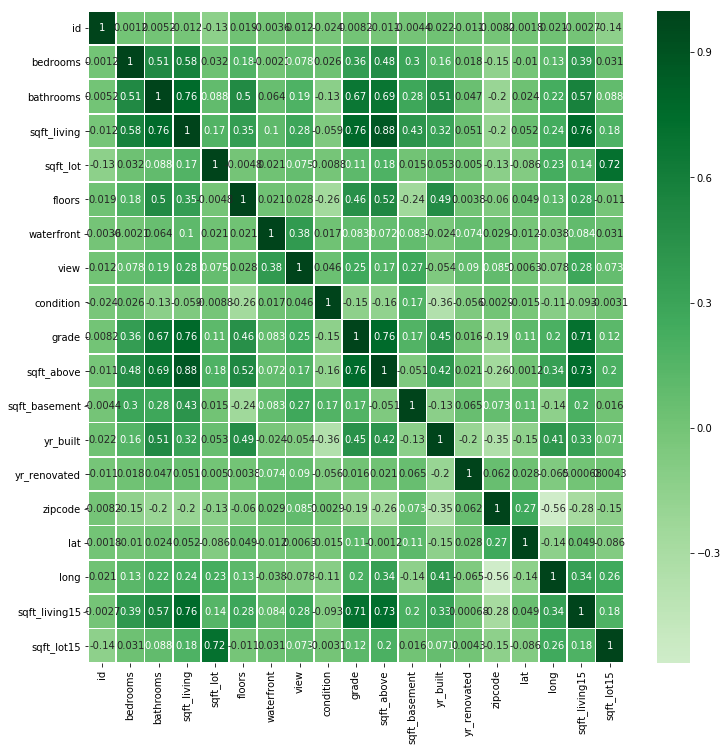

In [14]:
data_predictors= data.iloc[:,0:20] # the first 20 columns excluding the target variable
f, ax = plt.subplots(figsize=(12,12)) # setting the size of the figure
 # visualization of the correlation matrix using seaborn heatmap
sns.heatmap(data_predictors.corr(), center=0, linewidths=0.8, cmap='Greens', annot= True);

Based on the heatmap above, we can see that the dark green colors represent high correlations. Therefore, some of them might need to be removed.

For example, sqft_living has high correlation with sqft_living15 and sqft_above. 

### 2.7. Dropping Unecessary Columns

There are various factors on why columns can be dropped but the main reason would be if the features do not add any predictive value to the machine learning algorithm.
- Columns to drop:
- **sqft_basement**, since this value is already calculated as part of sqft_living
- **sqft_living15** and **sqft_lot15**, high correlation and only represent data from 2015
- **zip** and **id** are unique identifiers


In [15]:
data.drop(['zipcode', 'id','sqft_basement','sqft_living15', 'sqft_lot15'], axis=1, inplace=True) 

In [16]:
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,price
0,2014-10-13,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,0.0,47.5112,-122.257,221900.0
1,2014-12-09,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,47.7210,-122.319,538000.0
2,2015-02-25,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,0.0,47.7379,-122.233,180000.0
3,2014-12-09,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,47.5208,-122.393,604000.0
4,2015-02-18,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,47.6168,-122.045,510000.0


## 3. Exploratory Analysis

### 3.1. Comparing some features with the target

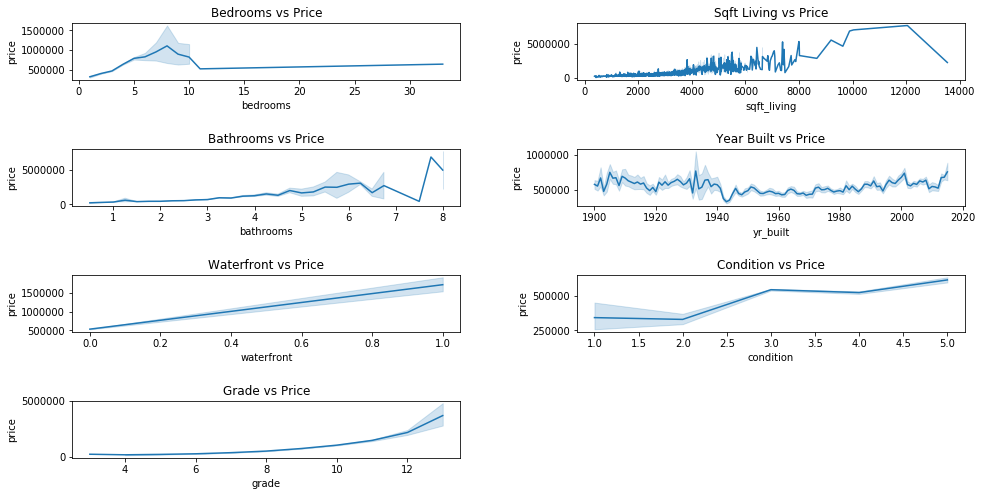

In [17]:
plt.figure(figsize=(16,8)) # setting figure size
plt.subplot(421)
sns.lineplot(data.bedrooms, data.price)
plt.ticklabel_format(style='plain')
plt.title('Bedrooms vs Price')
plt.subplot(422)
sns.lineplot(data.sqft_living, data.price)
plt.ticklabel_format(style='plain')
plt.title("Sqft Living vs Price")
plt.subplot(423)
sns.lineplot(data.bathrooms, data.price)
plt.ticklabel_format(style='plain')
plt.title("Bathrooms vs Price")
plt.subplot(424)
sns.lineplot(data.yr_built, data.price)
plt.ticklabel_format(style='plain')
plt.title("Year Built vs Price")
plt.subplot(425)
sns.lineplot(data.waterfront, data.price)
plt.ticklabel_format(style='plain')
plt.title ("Waterfront vs Price")
plt.subplot(426)
sns.lineplot(data.condition, data.price)
plt.ticklabel_format(style='plain')
plt.title("Condition vs Price")
plt.subplot(427)
sns.lineplot(data.grade, data.price)
plt.ticklabel_format(style='plain')
plt.title("Grade vs Price")
plt.subplots_adjust(wspace=0.3, hspace=1.20)
plt.ticklabel_format(style='plain')
plt.show()

Based on the figures above, we can see that some of the features are skewed and others have a highly positive relationship with the target.
For example, one would expect that as number of **bedrooms** and **square footage** (i.e sqft_living)increases, the house price would also increase. However, the lineplots above show the contrary. Prices do not really increase as bedrooms and sqft_living increase.
On the other hand, the last three graphs **waterfront, condition and grade** seem to have positive relationship with house prices in King county. 

### 3.2. House Prices Over the Years

Let's take a closer look on how the house prices have fluctuated over the years in King County. This was already shown above with `Year Built vs Price` graph. However, we will go into more details below

C:\Users\kadod\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


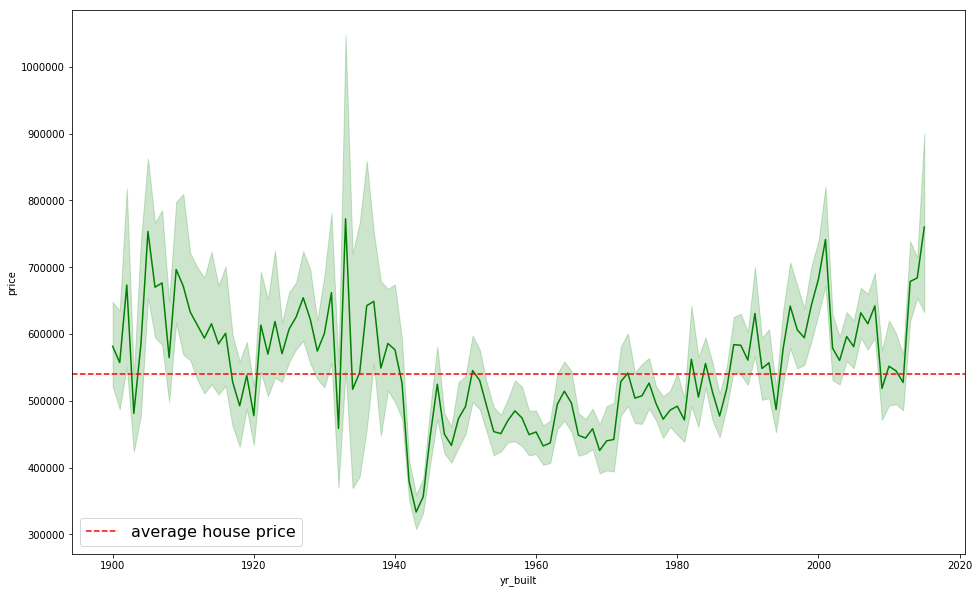

In [18]:
plt.figure(figsize=(16,10))
sns.lineplot(data.yr_built, data.price, color="green") # setting x and y values for the lineplot
ax= plt.axes()

#Adding a line to represent the mean value of house prices
ax.axhline(y=data['price'].mean(), color='red', linestyle = '--', label= 'average house price')
plt.legend(loc = 'lower left', fontsize = 16)
plt.show()

At first glance, we can see the house prices seem to trend downward between the 1930s and the 1940s. The house prices did not start trend upward until the 1980s and they keep on increasing as the years go by

### 3.3. Best Month to Sell

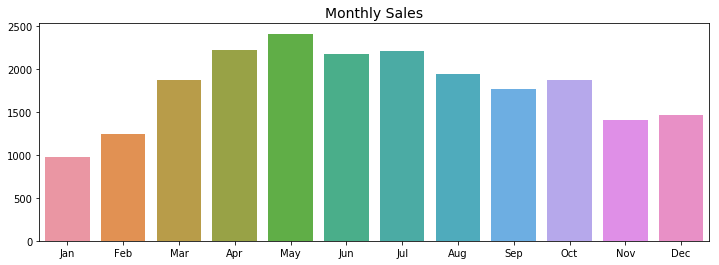

In [19]:
# create a date datraframe and extract the month
date = pd.to_datetime(data['date'])
date['month'] = date.dt.month

#creating a list of months to plot
month_list =["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sales_monthly= []

for i in range (1,13):
    sales_monthly.append(sum(date['month'] ==i))# adding sum of sales to empty list
    
plt.figure(figsize=(12,4))
sns.barplot(month_list, sales_monthly)
plt.title('Monthly Sales', fontdict={'fontsize': 14})
plt.show()

The figure above dictates that May is usually the best month to sell whereas early/later in the year, houses sell less. This could be due to the fact the home buyers would like to get settled in their homes for a while before the holidays. Other factors could be that it is easier to move during the summer. Moving during a cold and snowy season could be more difficult.

In [20]:
# Also removing the date feature
data.drop(['date'], axis =1, inplace=True)

### 3.4. Dealing with Categorical Variables

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
bedrooms        21597 non-null int64
bathrooms       21597 non-null float64
sqft_living     21597 non-null int64
sqft_lot        21597 non-null int64
floors          21597 non-null float64
waterfront      21597 non-null float64
view            21597 non-null float64
condition       21597 non-null int64
grade           21597 non-null int64
sqft_above      21597 non-null int64
yr_built        21597 non-null int64
yr_renovated    21597 non-null float64
lat             21597 non-null float64
long            21597 non-null float64
price           21597 non-null float64
dtypes: float64(8), int64(7)
memory usage: 2.5 MB


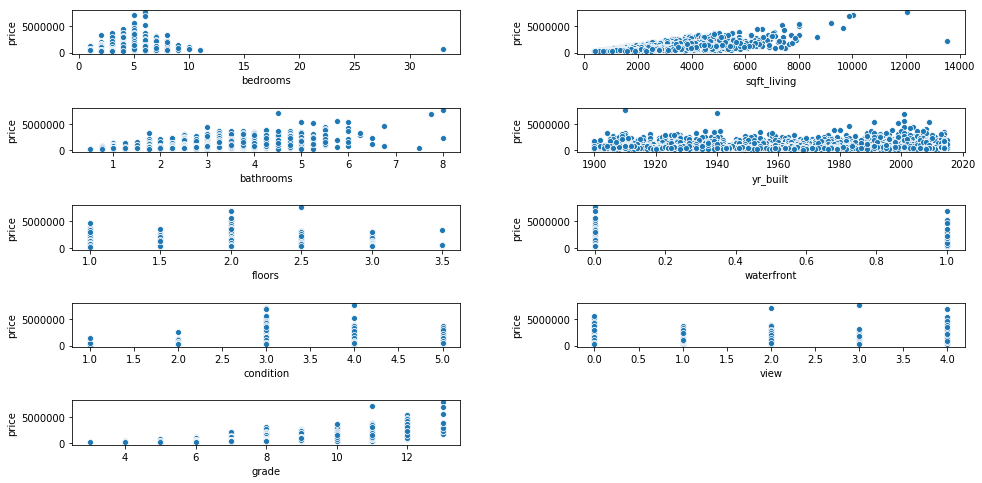

In [22]:
plt.figure(figsize=(16,8)) # setting figure size
plt.subplot(521)
sns.scatterplot(data.bedrooms, data.price)
plt.ticklabel_format(style='plain')
plt.subplot(522)
sns.scatterplot(data.sqft_living, data.price)
plt.ticklabel_format(style='plain')
plt.subplot(523)
sns.scatterplot(data.bathrooms, data.price)
plt.ticklabel_format(style='plain')
plt.subplot(524)
sns.scatterplot(data.yr_built, data.price)
plt.ticklabel_format(style='plain')
plt.subplot(525)
sns.scatterplot(data.floors, data.price)
plt.ticklabel_format(style='plain')
plt.subplot(526)
sns.scatterplot(data.waterfront, data.price)
plt.ticklabel_format(style='plain')
plt.subplot(527)
sns.scatterplot(data.condition, data.price)
plt.ticklabel_format(style='plain')
plt.subplots_adjust(wspace=0.3, hspace=1.20)
plt.ticklabel_format(style='plain')
plt.subplot(528)
sns.scatterplot(data.view, data.price)
plt.ticklabel_format(style='plain')
plt.subplot(529)
sns.scatterplot(data.grade, data.price)
plt.ticklabel_format(style='plain')
plt.show()

It is not always obvious which of our features are categorical. The scatterplots above can help make the difference! Usually, categorical variables in scatterplots generate vertical lines. Therefore, we can pick the figures that display non-continuous characteristics as our categorical variables:
- **bedrooms**
- **bathrooms**
- **yr_built** - Although may be considered as continuous, yr_built clearly represents a discrete measure
- **floors**
- **grade**
- **waterfront**
- **condition**
- **view**

Some additional categorical variables not displayed from the figures above:
- **yr_renovated** 
These additional values were selected since their values are not continuous

### 3.4.1 Convert Categorical Data

We need to convert our categorical variables to category so that our model can interpret them properly

In [23]:
data['bedrooms'] = data['bedrooms'].astype('category')
data['bathrooms'] = data['bathrooms'].astype('category')
data['yr_built'] = data['yr_built'].astype('category')
data['floors'] = data['floors'].astype('category')
data['waterfront']= data['waterfront'].astype('category')
data['condition'] = data['condition'].astype('category')
data['view'] = data ['view'].astype('category')
data['grade'] = data['grade'].astype('category')
data['yr_renovated'] = data['yr_renovated'].astype('category')

### 3.4.2 Creating Dummy Variables

In [24]:
bedrooms = pd.get_dummies(data.bedrooms, prefix='bedrooms', drop_first=True)
bathrooms = pd.get_dummies(data.bathrooms, prefix='bathrooms', drop_first=True)
yr_built = pd.get_dummies(data.yr_built, prefix='yr_built', drop_first=True)
floors = pd.get_dummies(data.floors, prefix='floors', drop_first=True)
waterfront = pd.get_dummies(data.waterfront, prefix='waterfront', drop_first=True)
condition = pd.get_dummies(data.condition, prefix='condition', drop_first=True)
grade = pd.get_dummies(data.grade, prefix='grade', drop_first=True)
view = pd.get_dummies(data.view, prefix='view', drop_first=True)
yr_renovated = pd.get_dummies(data.yr_renovated, prefix='yr_renovated', drop_first=True)

# Removing original columns from dataset and addind dummies to the dataset

data= data.drop(['bedrooms', 'bathrooms', 'yr_built', 'floors','waterfront','condition','grade','view' ,'yr_renovated'], axis=1)    

data = pd.concat([data, bedrooms, bathrooms, yr_built, floors, waterfront, condition, view,
                 yr_renovated],axis=1)


In [25]:
data.head()

,sqft_living,sqft_lot,sqft_above,lat,long,price,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,yr_renovated_2006.0,yr_renovated_2007.0,yr_renovated_2008.0,yr_renovated_2009.0,yr_renovated_2010.0,yr_renovated_2011.0,yr_renovated_2012.0,yr_renovated_2013.0,yr_renovated_2014.0,yr_renovated_2015.0
0,1180,5650,1180,47.5112,-122.257,221900.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2570,7242,2170,47.7210,-122.319,538000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,770,10000,770,47.7379,-122.233,180000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,1050,47.5208,-122.393,604000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1680,8080,1680,47.6168,-122.045,510000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


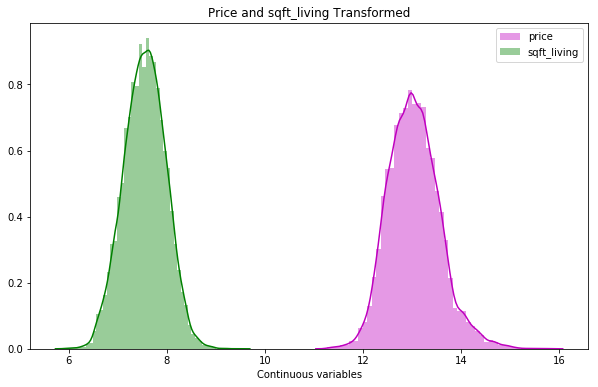

In [26]:
# Log Transform
price = np.log(data.price)
sqft_living = np.log(data.sqft_living)
sqft_lot = np.log(data.sqft_lot)
plt.figure(figsize=(10,6))
sns.distplot(price,label='price', color='m')
sns.distplot(sqft_living, label='sqft_living', color='g')
plt.title("Price and sqft_living Transformed")
plt.xlabel("Continuous variables")
plt.legend()
plt.show()


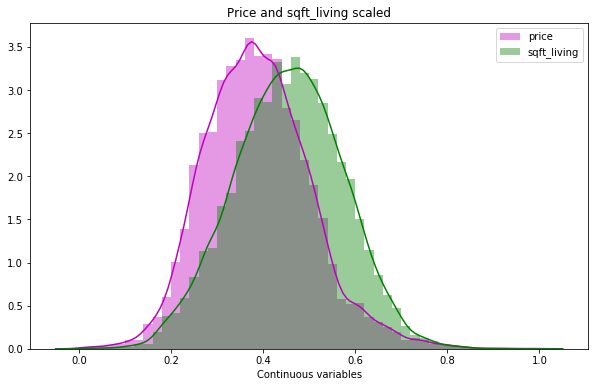

In [27]:
# Min Max Scaling

data['price'] = ( price - min(price) ) / ( max(price) - min(price) )
data['sqft_living'] = ( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )
# data['sqft_lot'] = ( sqft_lot - min(sqft_lot) ) / ( max(sqft_lot) - min(sqft_lot) )
plt.figure(figsize=[10,6])
sns.distplot(data['price'], label='price', color='m')
sns.distplot(data['sqft_living'], label='sqft_living', color='g')
plt.title("Price and sqft_living scaled")
plt.xlabel("Continuous variables")
plt.legend()
plt.show()

We can that feature max scaling improved the scale of the two continuous variables. Next, we will proceed to builf our model.

## 4. Building The Regression Model



In [28]:
def linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    # Errors
    print('R^2 Score:',round(linreg.score(X, y),2))
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))
    print('-----------------------------------')
    print('Average Predicted Price:', round(y_pred.mean(),4))
    print('Average Actual Price:', round(y_test.mean(), 4))
    
   
    return (linreg, y_pred, y_test)

def k_validation(X, y, cv=15, reveal_scores=False):
    score = cross_val_score(linreg, X, y, cv=cv, scoring="r2")
    print('Model Accuracy:',round(sum(score)/len(score),2)*100, '%')
    print(score) if reveal_scores else False
    
# Selecting features with p-value less than 0.05     
def feature_selection(X, y):
    est = sm.OLS(y, X).fit()
    pvalues = pd.DataFrame(est.pvalues, columns=['p'])
    features = list(pvalues[pvalues.p < 0.05].index)
    return features

In [29]:
## Assigning features and target
X= data.drop(['price'], axis=1)
y = data[['price']]
linreg, y_pred, y_test= linear_regression(X,y)

R^2 Score: 0.73
Mean Absolute Error: 0.04637
Root Mean Squared Error: 0.05993
-----------------------------------
Average Predicted Price: 0.3895
Average Actual Price: price    0.3891
dtype: float64


When testing our model, the R^2 value above shows that our model accounts for **73%** of the dataset. We can also see that there is minimal difference between the prices predicted and the actual prices.

### 4.1. Cross Validation

In [30]:
# Validation
k_validation(X,y,cv=10, reveal_scores=True)

Model Accuracy: 72.0 %
[0.73139992 0.72359336 0.71170059 0.71676123 0.70107516 0.72168515
 0.72020984 0.73320121 0.71963146 0.7117392 ]


Results from our cross validation has positive results. This is good! It indicates that our model intepreted the data pretty well.

In [31]:
notable_features = feature_selection(X,y)
print("Notable features:",len(notable_features), '\nTotal Features:', len(X.columns))

Notable features: 144 
Total Features: 242


### 4.2. Feature Selection

Let's perform feature selection by getting the features with p-values less than 0.05

In [32]:
# re-assigning features from notable features with p-value less than 5
X= data[notable_features]
y= data['price']
linreg, y_pred, y_test= linear_regression(X,y)

R^2 Score: 0.72
Mean Absolute Error: 0.04614
Root Mean Squared Error: 0.06006
-----------------------------------
Average Predicted Price: 0.3875
Average Actual Price: 0.3882


Our model did not change much and the R^2 value remains at approximately the same value. This means that our original model performed pretty well.

In [33]:
# Recheck Cross Validation
k_validation(X,y,cv=15, reveal_scores=True)

Model Accuracy: 72.0 %
[0.73351227 0.7232074  0.72154777 0.70065261 0.73837095 0.70415782
 0.693868   0.72368554 0.71457385 0.70706993 0.73987049 0.71978483
 0.71312319 0.7307593  0.71367631]


### What are the most significant features?

In [34]:
#printing the top 10 features
best_features = pd.DataFrame(linreg.coef_,index=notable_features, columns=["Top Features"])
best_features.sort_values(by="Top Features", ascending=False).head(5)

,Top Features
sqft_living,0.482385
lat,0.333101
bathrooms_7.75,0.106135
view_4.0,0.095542
bathrooms_6.25,0.095479


<Figure size 864x288 with 0 Axes>

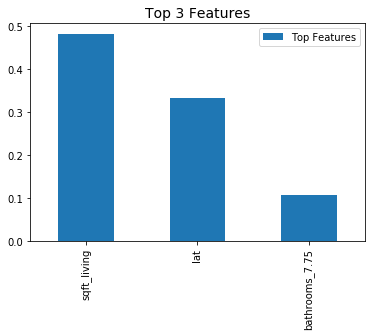

In [35]:
plt.figure(figsize=(12,4))
best_features.sort_values(by="Top Features",ascending=False)[:3].plot(kind='bar')

# sns.barplot(linreg.coef_, top_5)
plt.title('Top 3 Features', fontdict={'fontsize': 14})
plt.show()

## 5.0. Conclusion

The model performed with 73% accuracy after cleaning and transforming the data. We can that size, location, bathrooms and renovated are the items that would affect the price of the house the most.

There are things that could possibly be done to improve these results. More research can be done to perform other transformation methods or even conduct more in depth cleaning to remove unecessary features.